# This section presents the implemention and the analysis of the Gradient Descent. 



## In the first part:

To show the gradient descent algorithm, we can choose a regression problem to implement concretely. Here we will use sklearn’s Diabetes dataset. This data set contains various physiological health indicators and disease progression of patients with diabetes one year later, and is very suitable for demonstrating regression analysis.

1. We load the dataset.
2. we display the first few rows of the dataset and its descriptive statistics 

In [60]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Display the first few rows of the dataset to understand its structure
data = pd.DataFrame(X, columns=diabetes.feature_names)
data['progression'] = y

print(data.head())
print(data.describe())



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e

## In the second part:

1. we manually implement a simple gradient descent algorithm for fitting univariate linear regression models.
2. we print the optimal parameters found by gradient descent.
3. we visualize the effect of gradient descent by plotting the cost function as a function of the number of iterations.

Theta: [ 152.13348416   39.58865449   -5.37516497  162.37338189  118.19184639
   37.9637477    24.84162343 -100.83905767   98.31036454  149.67892306
   92.46850182]


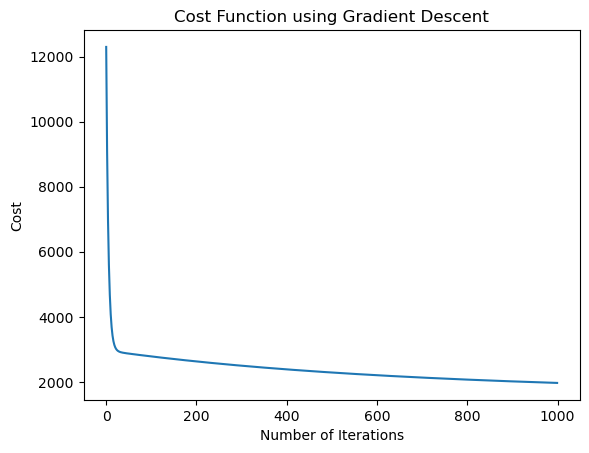

In [64]:
# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_errors = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(square_errors)

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Add a column of ones to X to account for the intercept term
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 for intercept
theta = np.random.randn(X_b.shape[1])  # random initialization

# Parameters for the gradient descent
learning_rate = 0.1
iterations = 1000

# Perform gradient descent
theta_best, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Print the optimal parameters found by gradient descent
print("Theta:", theta_best)

# Plotting the cost history
plt.plot(cost_history)
plt.title('Cost Function using Gradient Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

## In the third part:

1. we use the trained model above to make predictions and calculate its performance indicators, such as mean square error (MSE) and coefficient of determination (R²). 
2. we also draw a scatter plot of predicted values versus actual values to visually demonstrate the predictive power of the model.

Mean Squared Error: 3935.9268987661985
R^2 Score: 0.3362557676596869


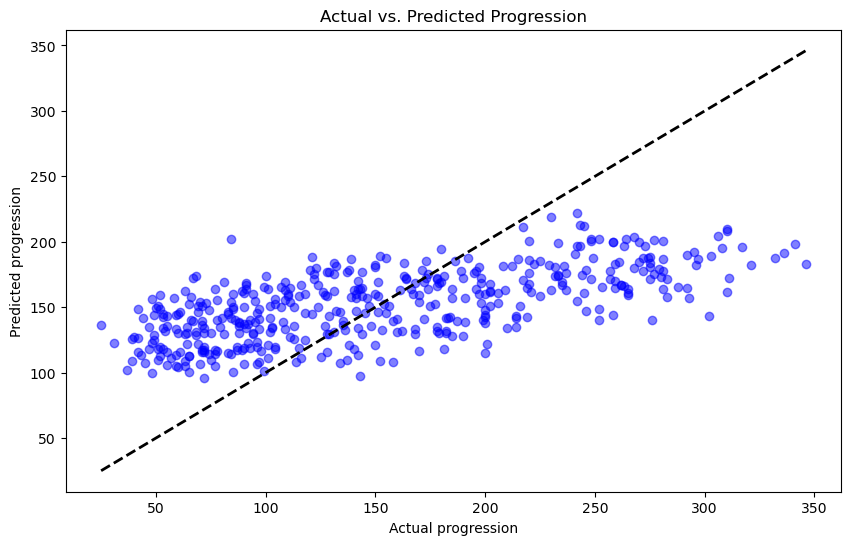

In [65]:
# Predictions
y_pred = X_b.dot(theta_best)

# Importing metrics from sklearn for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual progression')
plt.ylabel('Predicted progression')
plt.title('Actual vs. Predicted Progression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()



## Analysis part

The results shown above are not good. Then, we set a larger learning rate,1, and plot the results below.
The performance becomes better; however, it is still not good enough. Thus, we need better learning algorithms, such as logistic and linear regression, which will be discussed in the next sections.

Theta: [ 152.13348416    6.62182949 -197.6355148   487.91645631  302.3723547
  -42.73167229 -105.70019021 -206.68969085  128.01772259  407.96145884
  117.0274864 ]


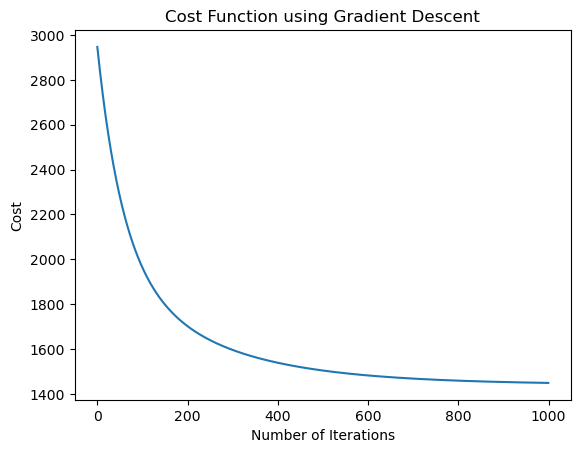

Mean Squared Error: 2898.9619729444576
R^2 Score: 0.511126771709365


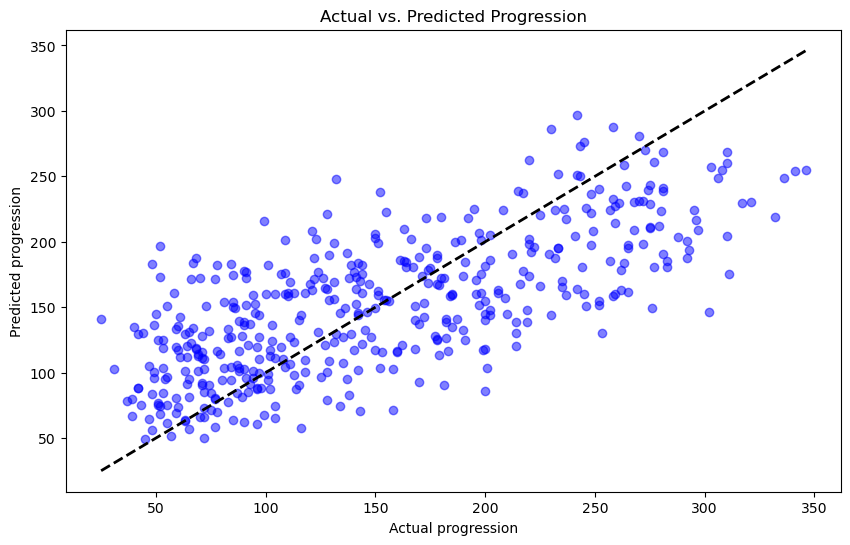

In [70]:
# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_errors = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(square_errors)

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Add a column of ones to X to account for the intercept term
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 for intercept
theta = np.random.randn(X_b.shape[1])  # random initialization

# Parameters for the gradient descent
learning_rate = 1
iterations = 1000

# Perform gradient descent
theta_best, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Print the optimal parameters found by gradient descent
print("Theta:", theta_best)

# Plotting the cost history
plt.plot(cost_history)
plt.title('Cost Function using Gradient Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

# Predictions
y_pred = X_b.dot(theta_best)

# Importing metrics from sklearn for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual progression')
plt.ylabel('Predicted progression')
plt.title('Actual vs. Predicted Progression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()